In [ ]:
import numpy as np
import pandas as pd
from gekko import GEKKO
from scipy.integrate import odeint 
import matplotlib.pyplot as plt
from scipy.integrate import odeint

First system using Euler's approximation

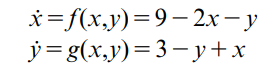

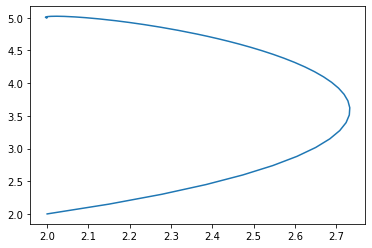

In [2]:
def x(x0,y0):
    sol=9-(2*x0)-y0
    return sol
def y(x0,y0):
    sol=3-y0+x0
    return sol

def euler(x0,y0,sim,delta):
    x_0=x0
    y_0=y0
    sol_x=[]
    sol_y=[]
    for t in range(sim):
       sol_x.append(x_0)
       sol_y.append(y_0)
       x_0=sol_x[t]+(x(sol_x[t],sol_y[t]))*delta
       y_0=sol_y[t]+(y(sol_x[t],sol_y[t]))*delta
    return np.array(sol_x),np.array(sol_y)

x,y=euler(2,2,400,0.05)

plt.plot(x,y)
plt.show()

Second problem using Gekko

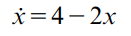

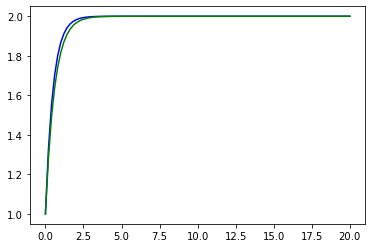

In [4]:
b=GEKKO()
tiempo_2=np.linspace(0,20,100)
x=b.Var(value=1.0)
b.time=tiempo_2
b.Equation(x.dt()==4-(2*x))
b.options.IMODE=4
b.solve(disp=False)


x_t=2-np.exp(-2*tiempo_2) #---> Defined solution
plt.plot(tiempo_2,x_t,c="blue")
plt.plot(b.time,x.value,c="green")
plt.show()

Second problem using scipy

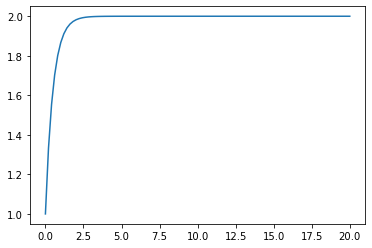

In [26]:
def second(x,t):
    x0=x
    dxdt=4-(2*x0)
    return dxdt
sol_second=odeint(second,1,tiempo_2)
vector=sol_second[:,0]
plt.plot(t,vector)
plt.show()

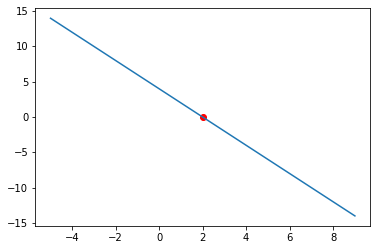

In [29]:
def differential(x):
    dxdt=4-(2*x)
    return np.array(dxdt)
x=np.arange(-5,10)
dxdt=differential(x)
plt.plot(x,dxdt)
plt.scatter(2,0,c="red")
plt.show()

First system solving formally ---> equilibrium (2,5)

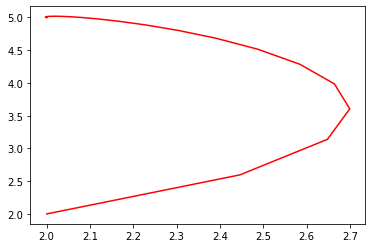

In [7]:
def equation_1(x,t):
    x0=x[0]
    y0=x[1]
    dxdt=9-(2*x0)-y0
    dydt=3-y0+x0
    return [dxdt,dydt]
t=np.linspace(0,20,100)
vector_x=odeint(equation_1,[2,2],t)
x_1=vector_x[:,0]
y_1=vector_x[:,1]
plt.plot(x_1,y_1,c="red")
plt.show()

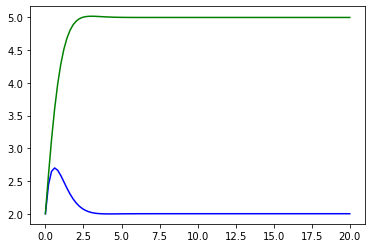

In [8]:
plt.plot(t,x_1,c="blue")
plt.plot(t,y_1,c="green")
plt.show()

System 2 (stable proper node)

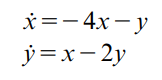

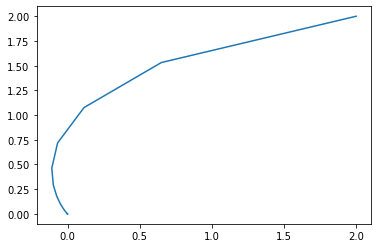

In [11]:
def equation_2(x,t):
    x0=x[0]
    y0=x[1]
    dxdt=(-4*x0)-y0
    dydt=x0-(2*y0)
    return [dxdt,dydt]
vector_x_2=odeint(equation_2,[2,2],t)
x_2=vector_x_2[:,0]
y_2=vector_x_2[:,1]
plt.plot(x_2,y_2)
plt.show() # Equilibrium (0,0)

System 3 (stable spiral) 

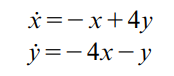

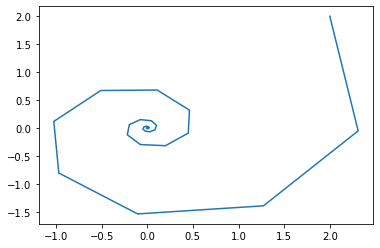

In [19]:
def equation_3(x,t):
    x0=x[0]
    y0=x[1]
    dxdt=-x0+(4*y0)
    dydt=(-4*x0)-y0
    return [dxdt,dydt]
vector_x_3=odeint(equation_3,[2,2],t)
x_3=vector_x_3[:,0]
y_3=vector_x_3[:,1]
plt.plot(x_3,y_3)
plt.show() #Equilibrium (0,0)

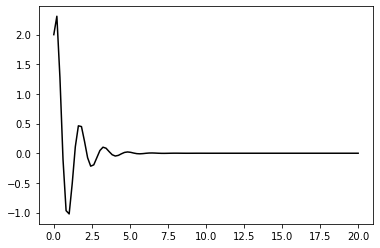

In [24]:
plt.plot(t,x_3,c="black")
plt.show()

System 4 (centre)

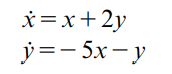

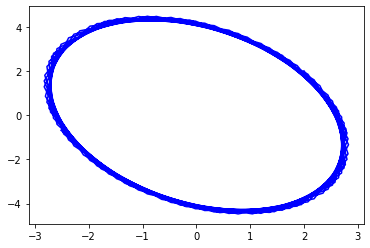

In [20]:
def equation_4(x,t):
    x0=x[0]
    y0=x[1]
    dxdt=x0+(2*y0)
    dydt=(-5*x0)-y0
    return [dxdt,dydt]
vector_x_4=odeint(equation_4,[2,2],t)
x_4=vector_x_4[:,0]
y_4=vector_x_4[:,1]
plt.plot(x_4,y_4,c="blue")
plt.show()

System 5 - Nonlinear system

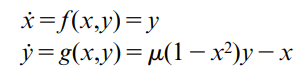

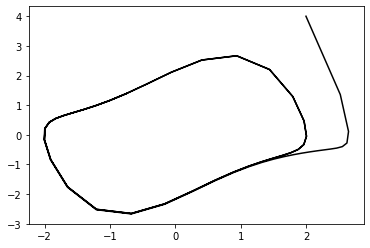

In [21]:
def equation_5(x,t):
    u=1
    x0=x[0]
    y0=x[1]
    dxdt=y0
    dydt=(u*(1-(x0**2))*y0)-x0
    return [dxdt,dydt]
vector_x5=odeint(equation_5,[2,4],t)
x_5=vector_x5[:,0]
y_5=vector_x5[:,1]
plt.plot(x_5,y_5,c="black")
plt.show()

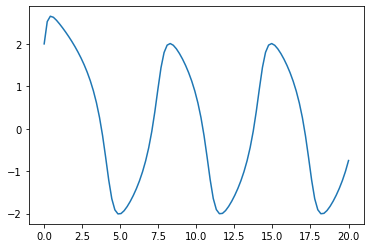

In [22]:
plt.plot(t,x_5)
plt.show()

References:
R. Shone (2003). "An introduction to economic dynamics". Cambridge University Press.